# Begining exploration of the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Data
In this section you will find data needed to train your model and a detailed description of it.

### Files
train.csv: training dataset predict.csv: dataset to predict price for sample_submission.csv: sample submission

### Features
- id: only for test & sample submission files, id for prediction sample identification
- price: price in USD
- carat: weight of the diamond
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm
- y: width in mm
- z: depth in mm
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)

In [2]:
diamonds = pd.read_csv("train.csv",index_col="id")
diamonds_test = pd.read_csv("predict.csv",index_col="id")
diamonds_submission = pd.read_csv("sample_submission.csv")

In [3]:
diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.50,Ideal,D,VS2,62.3,55.0,5.11,5.07,3.17,1845
1,1.54,Good,I,VS1,63.6,60.0,7.30,7.33,4.65,10164
2,1.32,Very Good,J,SI2,61.7,60.0,6.95,7.01,4.31,5513
3,1.20,Ideal,I,SI1,62.1,55.0,6.83,6.79,4.23,5174
4,1.73,Premium,I,SI1,61.2,60.0,7.67,7.65,4.69,10957


In [4]:
diamonds_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.45,Premium,E,SI1,62.8,58.0,4.88,4.84,3.05
1,1.23,Ideal,H,SI1,61.0,56.0,6.96,6.92,4.23
2,0.33,Ideal,I,IF,61.8,55.0,4.46,4.47,2.76
3,0.51,Premium,D,VS2,58.0,60.0,5.29,5.26,3.06
4,0.40,Premium,E,VS2,62.2,59.0,4.71,4.74,2.94


In [5]:
diamonds_submission.head()

,id,price
0,0,16964
1,1,6754
2,2,16579
3,3,10765
4,4,4971


Evaluation
The evaluation metric chosen for this competition is the RMSE (Root Mean Squared Error):

https://en.wikipedia.org/wiki/Root-mean-square_deviation

Submit results
Submissions are limited to 4 times a day.
The test set is divided into a public part (with which the public leaderboard is calculated, accessible during the competition) and another private part, with which the final positions are calculated, after the end of the competition.
Predictions will be sent in the format indicated in the sample_submission.csv file in the data section.

## Feature Exploration

Lets see...

In [6]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
#sns.pairplot(diamonds)

The diamonds price shape with respect to the other numerical variables hint that there is an exponential progression with carat, x, y and z. 

So we transform the price into logarithm.

In [8]:
di=diamonds.copy()
di["price"]=di["price"].apply(np.log10)

In [9]:
di.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.026242,0.183268,0.975538,0.944843,0.967968,0.920335
depth,0.026242,1.000000,-0.296991,-0.026495,-0.030529,0.095624,-0.000651
table,0.183268,-0.296991,1.000000,0.197330,0.184213,0.156565,0.160143
x,0.975538,-0.026495,0.197330,1.000000,0.967690,0.985338,0.958171
y,0.944843,-0.030529,0.184213,0.967690,1.000000,0.960890,0.928891
z,0.967968,0.095624,0.156565,0.985338,0.960890,1.000000,0.949079
price,0.920335,-0.000651,0.160143,0.958171,0.928891,0.949079,1.000000


Looking at the correlation (with respect to log and linear price), depth and table do not seem to be correlated with the price, so we can exclude them.

### Categorical

In [12]:
di.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.50,Ideal,D,VS2,62.3,55.0,5.11,5.07,3.17,3.265996
1,1.54,Good,I,VS1,63.6,60.0,7.30,7.33,4.65,4.007065
2,1.32,Very Good,J,SI2,61.7,60.0,6.95,7.01,4.31,3.741388
3,1.20,Ideal,I,SI1,62.1,55.0,6.83,6.79,4.23,3.713826
4,1.73,Premium,I,SI1,61.2,60.0,7.67,7.65,4.69,4.039692


In [13]:
di["cut"].value_counts() 

Ideal        16152
Premium      10321
Very Good     9040
Good          3729
Fair          1213
Name: cut, dtype: int64

In [14]:
di["color"].value_counts() 

G    8469
E    7282
F    7199
H    6210
D    5098
I    4091
J    2106
Name: color, dtype: int64

In [15]:
di["clarity"].value_counts() 

SI1     9758
VS2     9272
SI2     6895
VS1     6151
VVS2    3799
VVS1    2692
IF      1321
I1       567
Name: clarity, dtype: int64

In [16]:
#### (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

(array([0.1751292 , 0.7144806 , 0.53353315, 0.55447884, 0.59171561,
        0.65455267, 1.25441383, 0.54342417, 0.36480402, 0.2909123 ]),
 array([2.5132176 , 2.68935319, 2.86548877, 3.04162436, 3.21775995,
        3.39389553, 3.57003112, 3.7461667 , 3.92230229, 4.09843788,
        4.27457346]),
 [<matplotlib.patches.Polygon at 0x7f955dbdb8b0>])

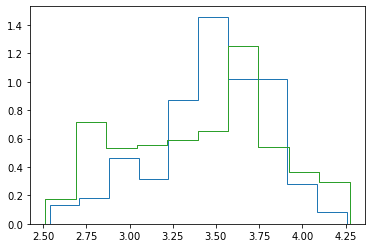

In [17]:
plt.hist(di[di["clarity"] == "I1"]["price"],histtype='step',density = True)
plt.hist(di[di["clarity"] == "SI1"]["price"],histtype='step',density = True)
plt.hist(di[di["clarity"] == "SI1"]["price"],histtype='step',density = True)



(array([0.21898516, 0.76875803, 0.95909956, 0.38715098, 0.81218547,
        0.61075608, 0.40008681, 0.73734244, 0.49895353, 0.29013224]),
 array([2.51454775, 2.69049721, 2.86644667, 3.04239613, 3.21834558,
        3.39429504, 3.5702445 , 3.74619396, 3.92214341, 4.09809287,
        4.27404233]),
 [<matplotlib.patches.Polygon at 0x7f955db42c10>])

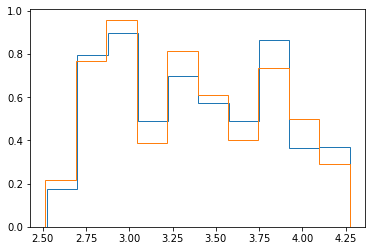

In [18]:
plt.hist(di[di["clarity"] == "VS2"]["price"],histtype='step',density = True)
plt.hist(di[di["clarity"] == "VS1"]["price"],histtype='step',density = True)


(array([0.09311384, 0.61189097, 2.55397969, 0.70500481, 0.55868306,
        0.34585142, 0.12858578, 0.12858578, 0.45670123, 0.27490754]),
 array([2.56702637, 2.73775337, 2.90848038, 3.07920739, 3.24993439,
        3.4206614 , 3.59138841, 3.76211541, 3.93284242, 4.10356943,
        4.27429643]),
 [<matplotlib.patches.Polygon at 0x7f955daad700>])

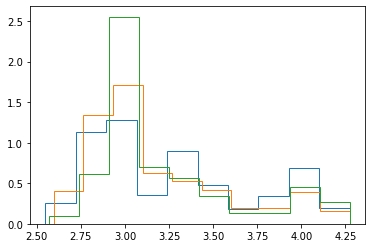

In [19]:
plt.hist(di[di["clarity"] == "VVS2"]["price"],histtype='step',density = True)
plt.hist(di[di["clarity"] == "VVS1"]["price"],histtype='step',density = True)
plt.hist(di[di["clarity"] == "IF"]["price"],histtype='step',density = True)


In [20]:
di=pd.get_dummies(di,drop_first=True)
#di=di.join(diamonds_dummy)   


In [21]:
di=di.drop(columns=["depth","table"])
dims=["x","y","z"]
for i in range(len(dims)):
    for j in range(i,len(dims)):
        col1 = dims[i]
        col2 = dims[j]
        di[f"{col1}*{col2}"] = di[col1]*di[col2]

In [22]:
y=di["price"]


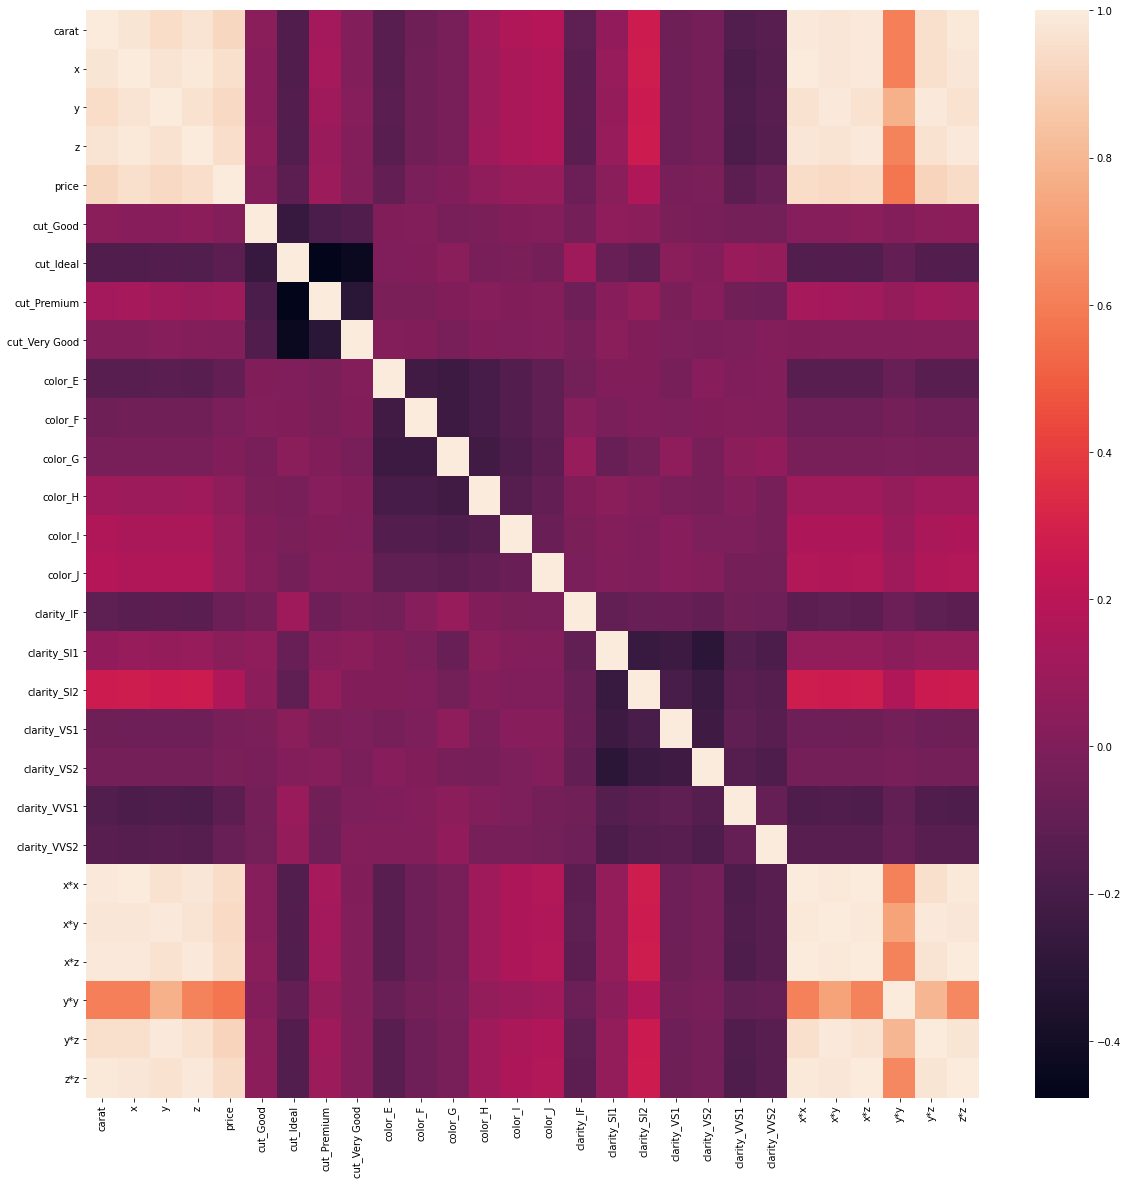

In [23]:
plt.figure(figsize = (20,20))
sns.heatmap(di.corr());

In [24]:
di.corr()

,carat,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,x*x,x*y,x*z,y*y,y*z,z*z
carat,1.000000,0.975538,0.944843,0.967968,0.920335,0.031302,-0.166458,0.118855,0.012417,-0.139292,...,-0.062971,-0.037712,-0.164522,-0.137088,0.991434,0.978943,0.990685,0.603799,0.955061,0.986929
x,0.975538,1.000000,0.967690,0.985338,0.958171,0.027740,-0.165750,0.128933,0.008005,-0.135140,...,-0.060182,-0.034291,-0.182014,-0.147321,0.994524,0.981581,0.990088,0.604001,0.953924,0.982240
y,0.944843,0.967690,1.000000,0.960890,0.928891,0.029399,-0.155119,0.109411,0.019685,-0.129892,...,-0.055954,-0.034718,-0.174782,-0.140768,0.962407,0.989911,0.962601,0.778268,0.989781,0.961792
z,0.967968,0.985338,0.960890,1.000000,0.949079,0.043478,-0.163820,0.093785,0.018484,-0.137216,...,-0.061396,-0.035962,-0.181409,-0.147037,0.978839,0.970636,0.991541,0.614931,0.962111,0.993615
price,0.920335,0.958171,0.928891,0.949079,1.000000,0.014856,-0.121526,0.096651,0.010199,-0.098594,...,-0.026188,-0.010593,-0.120440,-0.081048,0.944218,0.932965,0.942875,0.573831,0.909298,0.937701
cut_Good,0.031302,0.027740,0.029399,0.043478,0.014856,1.000000,-0.259772,-0.186484,-0.170933,0.006399,...,-0.015226,-0.021888,-0.037420,-0.040185,0.023302,0.024264,0.030688,0.014414,0.030650,0.038704
cut_Ideal,-0.166458,-0.165750,-0.155119,-0.163820,-0.121526,-0.259772,1.000000,-0.477107,-0.437320,0.001787,...,0.034321,0.016941,0.089552,0.075133,-0.163488,-0.158813,-0.162732,-0.096667,-0.154370,-0.162384
cut_Premium,0.118855,0.128933,0.109411,0.093785,0.096651,-0.186484,-0.477107,1.000000,-0.313941,-0.013255,...,-0.012991,0.023272,-0.054784,-0.060691,0.133301,0.123891,0.115327,0.075300,0.104262,0.097713
cut_Very Good,0.012417,0.008005,0.019685,0.018484,0.010199,-0.170933,-0.437320,-0.313941,1.000000,0.015257,...,-0.007187,-0.017493,-0.006083,0.014867,0.005638,0.011777,0.011198,0.009015,0.016498,0.015936
color_E,-0.139292,-0.135140,-0.129892,-0.137216,-0.098594,0.006399,0.001787,-0.013255,0.015257,1.000000,...,-0.029601,0.027250,-0.003244,0.012831,-0.137237,-0.135090,-0.138613,-0.081787,-0.132952,-0.139641


In [25]:
# Only going to keep z and maybe z

In [26]:
#diamonds_final = di[["x","z"]]
#diamonds_final=diamonds_final.join(diamonds_dummy, on='id')
#diamonds_final = pd.concat([di[["x","z"]], diamonds_dummy], axis=1)

In [27]:
di.corr()["price"].sort_values(ascending=False)

price            1.000000
x                0.958171
z                0.949079
x*x              0.944218
x*z              0.942875
z*z              0.937701
x*y              0.932965
y                0.928891
carat            0.920335
y*z              0.909298
y*y              0.573831
clarity_SI2      0.168267
cut_Premium      0.096651
color_J          0.080945
color_I          0.078834
color_H          0.059173
clarity_SI1      0.031810
cut_Good         0.014856
cut_Very Good    0.010199
color_G          0.005232
clarity_VS2     -0.010593
color_F         -0.016017
clarity_VS1     -0.026188
clarity_IF      -0.069947
clarity_VVS2    -0.081048
color_E         -0.098594
clarity_VVS1    -0.120440
cut_Ideal       -0.121526
Name: price, dtype: float64

Better dumies

- clarity IF: (VS1, VVS2, VVS1,) best IF OR other
- cut IF: (Premium, Ideal) best IF OR other
- color IF; (D,E,F)  best OR other

In [28]:
#di = diamonds.copy()
di.head()


,carat,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,x*x,x*y,x*z,y*y,y*z,z*z
id,,,,,,,,,,,,,,,,,,,,,
0,0.50,5.11,5.07,3.17,3.265996,0,1,0,0,0,...,0,1,0,0,26.1121,25.9077,16.1987,25.7049,16.0719,10.0489
1,1.54,7.30,7.33,4.65,4.007065,1,0,0,0,0,...,1,0,0,0,53.2900,53.5090,33.9450,53.7289,34.0845,21.6225
2,1.32,6.95,7.01,4.31,3.741388,0,0,0,1,0,...,0,0,0,0,48.3025,48.7195,29.9545,49.1401,30.2131,18.5761
3,1.20,6.83,6.79,4.23,3.713826,0,1,0,0,0,...,0,0,0,0,46.6489,46.3757,28.8909,46.1041,28.7217,17.8929
4,1.73,7.67,7.65,4.69,4.039692,0,0,1,0,0,...,0,0,0,0,58.8289,58.6755,35.9723,58.5225,35.8785,21.9961


In [29]:
#di["clarity_good"] = di["clarity"].apply(lambda x: 1 if x in ["VS1", "VVS2", "VVS1"] else 0)
#di["cut_good"] = di["cut"].apply(lambda x: 1 if x in ["Premium", "Ideal"] else 0)
#di["color_good"] = di["color"].apply(lambda x: 1 if x in ["D", "E", "F"] else 0)

In [30]:
X = di.drop(columns=["price"])

#sns.pairplot(X)  X = di.drop(columns=["price","cut","color","clarity"])
# X = di[["x","y","z","clarity_good","cut_good","color_good"]]


In [31]:
X.head()

,carat,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,...,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,x*x,x*y,x*z,y*y,y*z,z*z
id,,,,,,,,,,,,,,,,,,,,,
0,0.50,5.11,5.07,3.17,0,1,0,0,0,0,...,0,1,0,0,26.1121,25.9077,16.1987,25.7049,16.0719,10.0489
1,1.54,7.30,7.33,4.65,1,0,0,0,0,0,...,1,0,0,0,53.2900,53.5090,33.9450,53.7289,34.0845,21.6225
2,1.32,6.95,7.01,4.31,0,0,0,1,0,0,...,0,0,0,0,48.3025,48.7195,29.9545,49.1401,30.2131,18.5761
3,1.20,6.83,6.79,4.23,0,1,0,0,0,0,...,0,0,0,0,46.6489,46.3757,28.8909,46.1041,28.7217,17.8929
4,1.73,7.67,7.65,4.69,0,0,1,0,0,0,...,0,0,0,0,58.8289,58.6755,35.9723,58.5225,35.8785,21.9961


## Training model

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8 )

In [33]:

from sklearn import linear_model
linreg = linear_model.LinearRegression().fit(X_train, y_train)

In [34]:
from sklearn.linear_model import ElasticNet
en_regr = ElasticNet(random_state=0)
en_regr.fit(X_train, y_train)

ElasticNet(random_state=0)

In [35]:
y_pred_train = en_regr.predict(X_train)
from sklearn.metrics import r2_score
r_squared_train = r2_score(10**y_train.values, 10**y_pred_train)
print("R**2 (train) =",r_squared_train)

y_pred_test = en_regr.predict(X_test)
r_squared_test = r2_score(10**y_test.values, 10**y_pred_test)
print("R**2 (test) =",r_squared_test)

from sklearn.metrics import mean_squared_error

print("RMSE (train) =",mean_squared_error(10**y_train.values, 10**y_pred_train, squared=False))

print("RMSE (test) =",mean_squared_error(10**y_test.values, 10**y_pred_test, squared=False))


R**2 (train) = -0.07775606173687288
R**2 (test) = 0.38681926626172347
RMSE (train) = 4184.675024376362
RMSE (test) = 3071.1950323293663


In [36]:
y_pred_train = linreg.predict(X_train)
from sklearn.metrics import r2_score
r_squared_train = r2_score(10**y_train.values, 10**y_pred_train)
print("R**2 (train) =",r_squared_train)

y_pred_test = linreg.predict(X_test)
r_squared_test = r2_score(10**y_test.values, 10**y_pred_test)
print("R**2 (test) =",r_squared_test)

from sklearn.metrics import mean_squared_error

print("RMSE (train) =",mean_squared_error(10**y_train.values, 10**y_pred_train, squared=False))

print("RMSE (test) =",mean_squared_error(10**y_test.values, 10**y_pred_test, squared=False))

R**2 (train) = 0.9313251216746636
R**2 (test) = 0.9144654205237753
RMSE (train) = 1056.332031402833
RMSE (test) = 1147.054382461037


## To deliver

In [37]:

linreg_f = linear_model.LinearRegression().fit(X_train, y_train)
linreg_f.fit(X, y)
y_pred = linreg_f.predict(X)
print("RMSE (train) =",mean_squared_error(10**y.values, 10**y_pred, squared=False))

RMSE (train) = 989.3712678826125


In [38]:
diamonds_test = pd.read_csv("predict.csv",index_col="id")

diamonds_test=diamonds_test.drop(columns=["depth","table"])

diamonds_test = pd.get_dummies(diamonds_test,drop_first=True)
diamonds_test.head()

dims=["x","y","z"]
for i in range(len(dims)):
    for j in range(i,len(dims)):
        col1 = dims[i]
        col2 = dims[j]
        diamonds_test[f"{col1}*{col2}"] = diamonds_test[col1]*diamonds_test[col2]

In [39]:
diamonds_test.columns

Index(['carat', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'x*x', 'x*y', 'x*z',
       'y*y', 'y*z', 'z*z'],
      dtype='object')

In [40]:
predicted = 10**linreg_f.predict(diamonds_test)

In [41]:
diamonds_test["price"]=predicted

In [42]:
diamonds_test["price"]

id
0        1109.764373
1        6162.112858
2         802.082689
3        1816.294309
4        1047.720106
            ...     
13480     378.620053
13481    3759.813671
13482     956.984049
13483     625.377015
13484    3962.064695
Name: price, Length: 13485, dtype: float64

In [43]:
diamonds_test["price"].to_csv("first_pred.csv")

In [82]:
diamonds = pd.read_csv("train.csv",index_col="id")
diamonds["price"]=diamonds["price"].apply(np.log10)

In [83]:
diamonds[3.8<diamonds["price"]].corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.030917,0.166023,0.959760,0.718528,0.900914,0.699274
depth,0.030917,1.000000,-0.305996,-0.097623,-0.089681,0.161849,-0.055096
table,0.166023,-0.305996,1.000000,0.176095,0.120434,0.084302,0.056587
x,0.959760,-0.097623,0.176095,1.000000,0.746520,0.901996,0.689838
y,0.718528,-0.089681,0.120434,0.746520,1.000000,0.730795,0.521429
z,0.900914,0.161849,0.084302,0.901996,0.730795,1.000000,0.631569
price,0.699274,-0.055096,0.056587,0.689838,0.521429,0.631569,1.000000


In [84]:
diamonds[diamonds["price"]<3.8].corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.067676,0.205025,0.984313,0.967639,0.979453,0.929073
depth,0.067676,1.000000,-0.294379,-0.005677,-0.009602,0.145076,0.024151
table,0.205025,-0.294379,1.000000,0.210667,0.198924,0.159449,0.169515
x,0.984313,-0.005677,0.210667,1.000000,0.982663,0.982850,0.949185
y,0.967639,-0.009602,0.198924,0.982663,1.000000,0.970926,0.935332
z,0.979453,0.145076,0.159449,0.982850,0.970926,1.000000,0.939062
price,0.929073,0.024151,0.169515,0.949185,0.935332,0.939062,1.000000


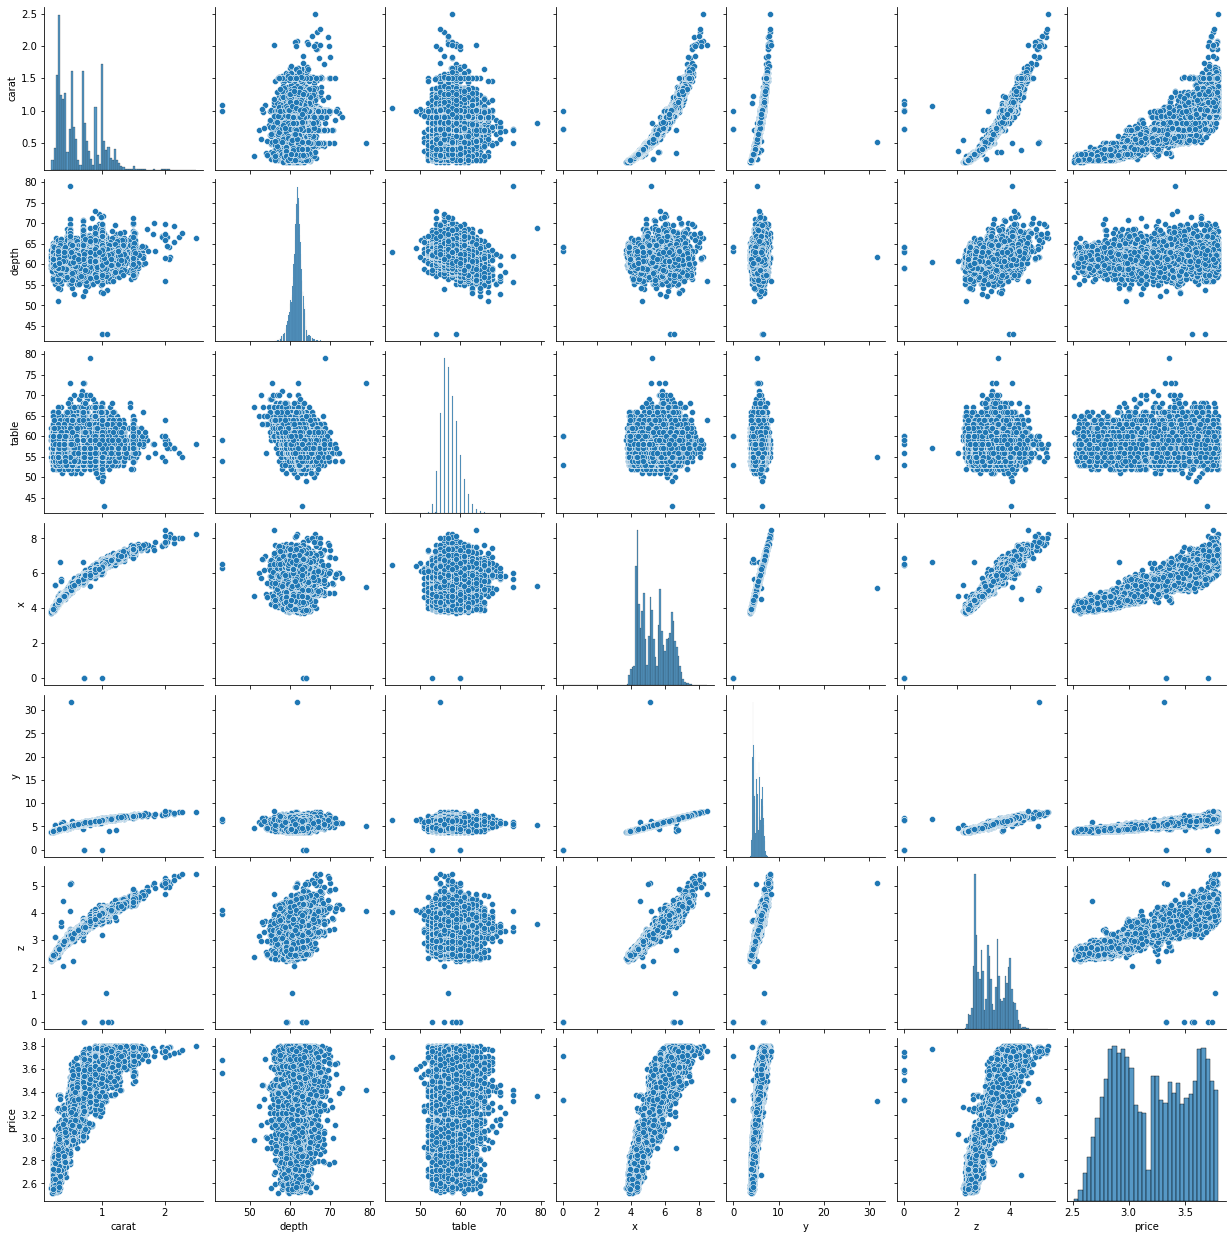

In [86]:
sns.pairplot(diamonds[diamonds["price"]<3.8])

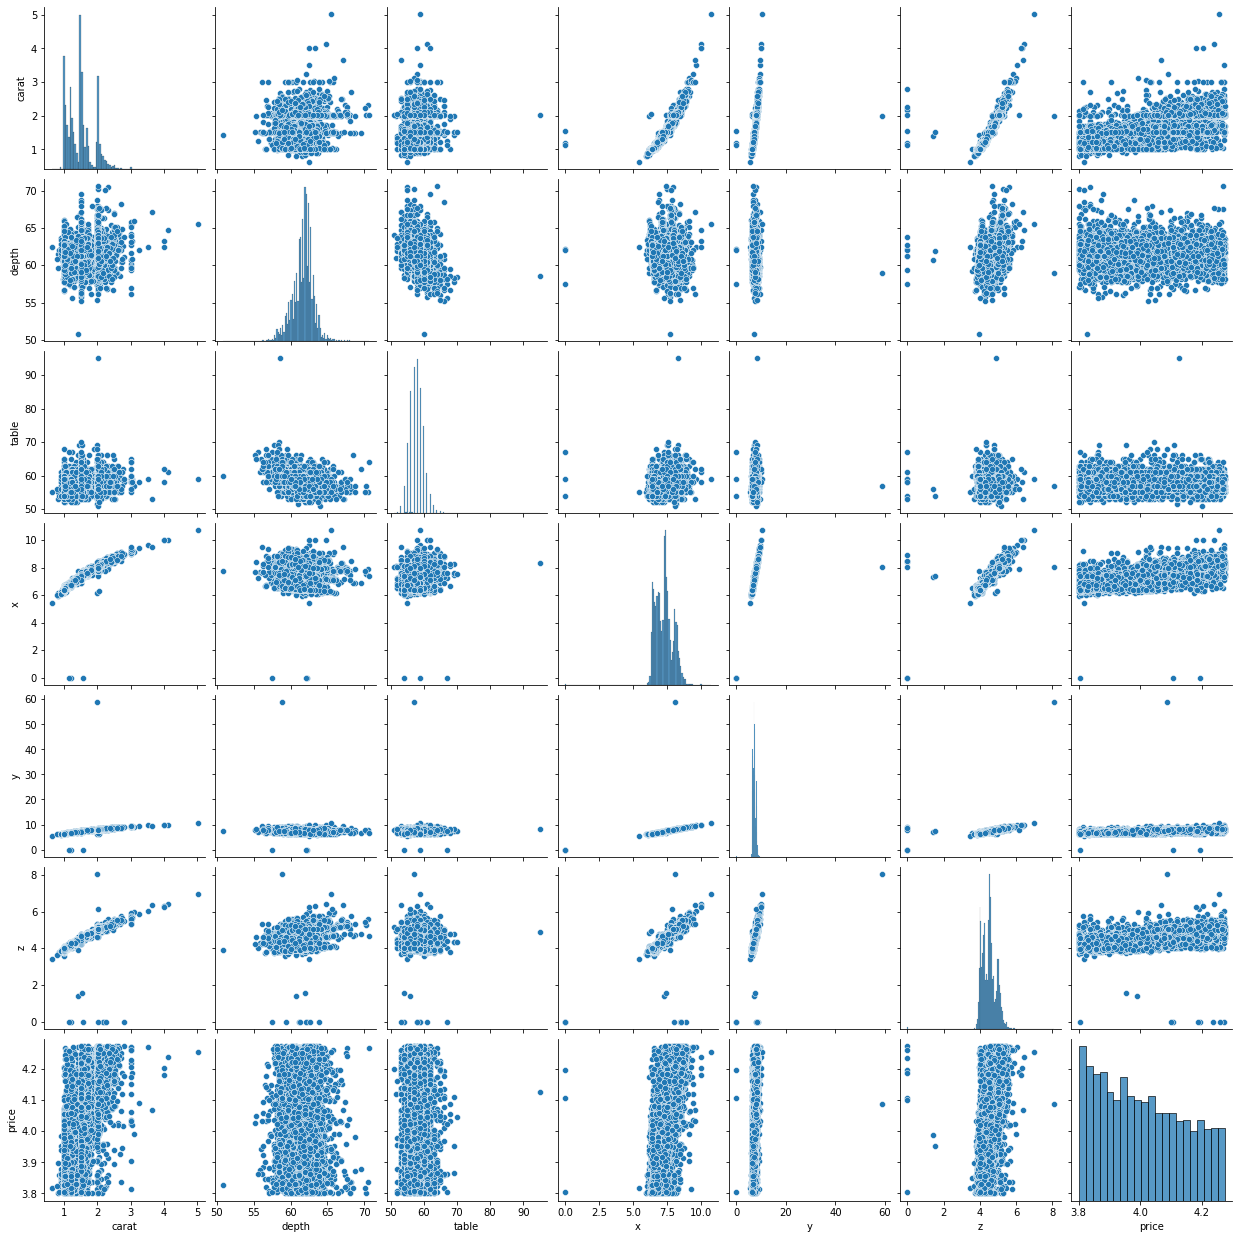

In [85]:
sns.pairplot(diamonds[3.8<diamonds["price"]])